In [1]:
# Import library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,ShuffleSplit
from sklearn import svm
import sys
# sys.path.append('/home/ralfahad/PythonUtility/PTE')
# from PhaseTE_MF import PhaseTE_MF
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt
from collections import Counter
import warnings
from sklearn import svm, metrics,preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, auc,classification_report
from matplotlib import pyplot as plt
from collections import Counter
from scipy.stats import norm
# from sklearn import metrics
# import seaborn as sns; sns.set(font_scale=1.2)
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
#Load the metadata
# path='/home/sultan/EEG/Source_Level_Analysis/25sam_10ms_clear_all_erp.csv'
# path="/home/sultan/EEG/Source_Level_Analysis/50tr10ms_all_clear_erp.csv"
# path="/home/sultan/EEG/Source_Level_Analysis/75sam_10ms_clear_all_erp.csv"
# path="/home/sultan/EEG/Source_Level_Analysis/100sam_10ms_clear_all_erp.csv"
path="C:/Users/sultan/OneDrive - The University of Memphis/RESEARCH2017S/0_Source_Level_Analysis_19/FINAL_DATA_FOR_GITHUB/Source_Level_Analysis/100sam_10ms_clear_all_erp.csv"
# path="/home/sultan/EEG/Source_Level_Analysis/125sam_10ms_clear_all_erp.csv"
Metadata=pd.read_csv(path)
Metadata.head(2)

,Unnamed: 0,label,0,1,2,3,4,5,6,7,...,1418,1419,1420,1421,1422,1423,1424,1425,1426,1427
0,0,0.0,7.534168e-11,6.231124e-10,-7.806000e-10,-8.063316e-10,4.260259e-10,8.792373e-11,-2.653489e-10,2.412203e-10,...,1.956881e-10,2.334939e-10,-7.550422e-11,1.972939e-10,3.158191e-10,2.702473e-10,2.155772e-10,2.427227e-10,-1.328829e-10,-5.014970e-10
1,1,0.0,2.256533e-10,1.718130e-10,1.905604e-11,1.276511e-11,-1.379325e-10,-6.269328e-11,-2.930309e-10,2.040993e-10,...,2.343108e-10,2.950671e-11,-2.800265e-10,1.916018e-10,2.510715e-10,1.861655e-10,-2.830894e-10,2.069608e-10,-7.302684e-11,-2.662402e-10


In [3]:
# ##Load the metadata
# # path='/home/sultan/EEG/Source_Level_Analysis/25sam_10ms_noise_all_erp.csv'
# # path='/home/sultan/EEG/Source_Level_Analysis/50Tr10msnoise_all_erp.csv'
# # path="/home/sultan/EEG/Source_Level_Analysis/75sam_10ms_noise_all_erp.csv"
# path="/home/sultan/EEG/Source_Level_Analysis/100sam_10ms_noise_all_erp.csv"
# # path="/home/sultan/EEG/Source_Level_Analysis/125sam_10ms_noise_all_erp.csv"
# Metadata=pd.read_csv(path)
# Metadata.head(2)

In [4]:
X=Metadata.iloc[:,2:]
y=Metadata['label']
X.shape,y.shape

((1863, 1428), (1863,))

# Apply SVM on Data

In [5]:
gamma_range = np.logspace(-2, 2, 5)
gamma_range

array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])

In [6]:
from sklearn import preprocessing
# X=preprocessing.scale(X)
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)
print (X.shape,y.shape)
from sklearn.preprocessing import label_binarize
y=label_binarize(np.asarray(y),[0,1])

#C_range = np.logspace(-2, 10, 13)
# gamma_range = np.logspace(-2, 2, 5)
gamma_range = [0.01,0.002,0.00069,0.0007,0.0005]
C_range = np.logspace(-2, 2, 5)
#gamma_range = np.logspace(-2, 2, 5)

print (C_range,gamma_range)


(1863, 1428) (1863,)
[1.e-02 1.e-01 1.e+00 1.e+01 1.e+02] [0.01, 0.002, 0.00069, 0.0007, 0.0005]


In [7]:
#Classifiaction:
# #Splitting
from sklearn import preprocessing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=92)
cv = ShuffleSplit(X_train.shape[0], test_size=0.20, random_state=92)

# Define Classifier
svr = svm.SVC(kernel='rbf')

# Deffine tuning parameter
C_range = np.logspace(-2, 2, 5)
# gamma_range = np.logspace(-2, 2, 5)
gamma_range = [0.01,0.002,0.00069,0.0007,0.0005]
param_grid = dict(gamma=gamma_range, C=C_range)
clf_Tune = GridSearchCV(estimator=svr, cv=5, param_grid=param_grid,n_jobs=-1, verbose=True)
clf_Tune.fit(X_train,y_train)
print ('Finish tuning' )     

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:  5.7min finished


Finish tuning


In [8]:
y_p = clf_Tune.best_estimator_.predict(X_test)
ACC=classification_report(y_test, y_p)
print (ACC)
ACC_AVG=accuracy_score(y_test, y_p)
print (ACC_AVG)
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_p)
AUC_Th2_T=metrics.auc(fpr, tpr)
print (AUC_Th2_T)

              precision    recall  f1-score   support

           0       0.96      0.84      0.89       159
           1       0.89      0.97      0.93       214

   micro avg       0.91      0.91      0.91       373
   macro avg       0.92      0.90      0.91       373
weighted avg       0.92      0.91      0.91       373

0.9142091152815014
0.9042203021219068


In [9]:
y_p=clf_Tune.best_estimator_.predict(X_test)
print ("Accuracy:", clf_Tune.score(X_test, y_test))  
# print pred
# print y_test
print ("support:", len(clf_Tune.best_estimator_.support_vectors_)*100.0/(X_train.shape[0]))

Accuracy: 0.9142091152815014
support: 65.30201342281879


In [10]:
# print 'Validation accuracy={}, best {}' .format(clf_Tune.best_score_,clf_Tune.best_params_)
clf_Tune.best_params_
# clf_Tune.best_estimator_

{'C': 10.0, 'gamma': 0.00069}

In [11]:
# # Utility function to move the midpoint of a colormap to be around
# # the values of interest.
# from matplotlib.colors import Normalize
# class MidpointNormalize(Normalize):

#     def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
#         self.midpoint = midpoint
#         Normalize.__init__(self, vmin, vmax, clip)

#     def __call__(self, value, clip=None):
#         x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
#         return np.ma.masked_array(np.interp(value, x, y))
    
# scores = clf_Tune.cv_results_['mean_test_score'].reshape(len(C_range),len(gamma_range))
# #print scores.shape,len(C_range),len(gamma_range)
# plt.figure(figsize=(8, 6))
# #plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
# plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot, norm=MidpointNormalize(vmin=0.2, midpoint=0.92))
# plt.xlabel('gamma')
# plt.ylabel('C')
# plt.colorbar()
# plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
# plt.yticks(np.arange(len(C_range)), C_range)
# plt.title('Validation accuracy={}, best {}' .format(clf_Tune.best_score_,clf_Tune.best_params_))

# #filename='ParameterTuning'
# #save_format='png'
# #print filename+'.'+save_format
# #pp='home/ralfahad/Pictures'
# #plt.savefig(filename+'.'+save_format,dpi=100)
# #plt.show()

# Find Significant correlation with stability selections 

### Make the dataset

In [12]:
# Pre Processing 
X[0,:10]

array([-0.76432469,  1.32792655, -2.91754842, -3.32632635,  2.68795091,
        0.78058946, -0.44020117,  0.92741514,  0.30042852,  0.71271032])

In [13]:
from sklearn import preprocessing
X=preprocessing.scale(X)
# scaler = preprocessing.StandardScaler()
# X = scaler.fit_transform(X)
print(X.shape,y.shape)
from sklearn.preprocessing import label_binarize
y=label_binarize(np.asarray(y),[0,1])

(1863, 1428) (1863, 1)


In [14]:
# np.var(X[:,1])

### Randomized Logistic Regression 

In [15]:
from sklearn.linear_model import (RandomizedLasso, lasso_stability_path,LassoLarsCV)
from sklearn.exceptions import ConvergenceWarning

#Model Library
from sklearn.linear_model import (RandomizedLasso, lasso_stability_path, LassoLarsCV)
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression, RandomizedLogisticRegression
from sklearn import svm

# Performance analysis library 
from sklearn.model_selection import KFold, cross_val_score, LeaveOneOut, cross_val_predict
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


# preprocessing
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split # test train split
from sklearn.model_selection import ShuffleSplit

In [16]:
with warnings.catch_warnings():
    #warnings.simplefilter('ignore', UserWarning)
    warnings.simplefilter('ignore', ConvergenceWarning)
    lars_cv = LassoLarsCV(cv=5).fit(X, y)
# print lars_cv.alpha_
lars_cv.alphas_

array([0.00395078])

In [17]:
# Run the RandomizedLasso: we use a paths going down to .1*alpha_max
# to avoid exploring the regime in which very noisy variables enter
# the model
alphas = np.linspace(lars_cv.alphas_[0], .1 * lars_cv.alphas_[0], 10)
print (alphas)
clf = RandomizedLasso(alpha=alphas, random_state=92,max_iter=1000).fit(X, y)

[0.00395078 0.0035557  0.00316062 0.00276555 0.00237047 0.00197539
 0.00158031 0.00118523 0.00079016 0.00039508]


In [18]:
clf.scores_

array([0.035, 0.01 , 0.01 , ..., 0.16 , 0.01 , 0.   ])

In [19]:
# # Rank the Features according to the importance
# names=range(0,1428) # Feature names used as 1-1428 features
# cn=np.asarray(names) # converted as numpy.ndarray
# # print "Features sorted by their score:"
# b= sorted(zip(map(lambda x: round(x, 4), clf.scores_), cn), reverse=True)
# bb=np.asarray(b)
# rakfe=bb[bb[:,0]>0.34]
# ROIs=rakfe[:,1]%68

In [20]:
# # print "Features sorted by their score:"
# b= sorted(zip(map(lambda x: round(x, 4), clf.scores_), 
#                  cn), reverse=True)

In [21]:
# bb=np.asarray(b)
# # rf=np.where(bb[:,0]>0.7)
# # ifea=np.squeeze(np.asarray(np.where(clf.scores_>=0.815)))
# ra=bb[bb[:,0]>0.50]
# # r=bb[e]
# ra[:,1]%68

In [22]:
# ind=np.where(clf.scores_>=0.710)
# ind

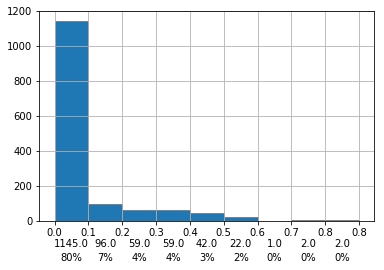

In [23]:
from matplotlib.ticker import FormatStrFormatter
data=clf.scores_
fig, ax = plt.subplots()
counts, bins, patches = ax.hist(data,9 ,edgecolor='gray')

# Set the ticks to be at the edges of the bins.
ax.set_xticks(bins)

# Set the xaxis's tick labels to be formatted with 1 decimal place...
ax.xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))


# Label the raw counts and the percentages below the x-axis...
bin_centers = 0.5 * np.diff(bins) + bins[:-1]
for count, x in zip(counts, bin_centers):
    # Label the raw counts
    ax.annotate(str(count), xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -18), textcoords='offset points', va='top', ha='center')

    # Label the percentages
    percent = '%0.0f%%' % (100 * float(count) / counts.sum())
    ax.annotate(percent, xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -32), textcoords='offset points', va='top', ha='center')


# Give ourselves some more room at the bottom of the plot
plt.subplots_adjust(bottom=0.15)
plt.grid(True)
plt.show()

### Find the optimal threshold

In [24]:
bins

array([0.        , 0.09388889, 0.18777778, 0.28166667, 0.37555556,
       0.46944444, 0.56333333, 0.65722222, 0.75111111, 0.845     ])

In [25]:
Th_2_Bins_Index= np.where((bins<=1.0) & (bins>=0.0)) # take the bins within a range
# print Th_2_Bins_Index
print (bins)
Th_2_Bins=bins[Th_2_Bins_Index]
print (Th_2_Bins)

[0.         0.09388889 0.18777778 0.28166667 0.37555556 0.46944444
 0.56333333 0.65722222 0.75111111 0.845     ]
[0.         0.09388889 0.18777778 0.28166667 0.37555556 0.46944444
 0.56333333 0.65722222 0.75111111 0.845     ]


In [26]:
from sklearn import preprocessing
X=preprocessing.scale(X)
print (X.shape,y.shape)
from sklearn.preprocessing import label_binarize
y=label_binarize(np.asarray(y),[0,1])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=92)
print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1863, 1428) (1863, 1)
(1490, 1428) (373, 1428) (1490, 1) (373, 1)


In [27]:
X_train[:,1:10]

array([[-0.79197274,  2.7838314 ,  2.18031617, ...,  0.14959239,
        -1.99548485, -2.84134498],
       [-0.33572768, -2.5921579 , -2.13374278, ..., -0.93984522,
         2.02467195,  2.61420405],
       [ 0.9844153 , -2.19640658, -1.48143186, ..., -1.50449258,
         2.14738738,  2.81531171],
       ...,
       [-0.11624771,  1.56730923,  2.00606893, ..., -0.37015069,
         0.45745785,  0.12915355],
       [-0.31195053, -0.64063873, -0.70753496, ...,  0.32717497,
        -1.68209631, -0.8625357 ],
       [-0.75079028, -0.20910409,  0.24086477, ..., -1.87496072,
         1.75614211,  0.58693523]])

In [28]:
type(X_train)#[:,np.squeeze(np.asarray(np.where(clf.scores_>=0.16)))].shape#,y_train

numpy.ndarray

In [29]:
# C_range = np.logspace(-2, 2, 5)
C_range = [1,2,4,6,8,10,12,15,16,20,30,40,100]
gamma_range = [0.01,0.002,0.00069,0.0007,0.0005]
# gamma_range = np.logspace(-2, 2, 5)
param_grid = dict(gamma=gamma_range, C=C_range)
#clf_Tune = GridSearchCV(estimator=svr, cv=1, param_grid=param_grid,n_jobs=-1)
clf_Tune = GridSearchCV(estimator=svr, cv=5, param_grid=param_grid,n_jobs=-1, verbose=True)
clf_Tune.fit(X_train[:,np.squeeze(np.asarray(np.where(clf.scores_>=Th_2_Bins[0])))],y_train)

Fitting 5 folds for each of 65 candidates, totalling 325 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 325 out of 325 | elapsed: 14.3min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'gamma': [0.01, 0.002, 0.00069, 0.0007, 0.0005], 'C': [1, 2, 4, 6, 8, 10, 12, 15, 16, 20, 30, 40, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [30]:
# use tuned parameter on to get model
y_p = clf_Tune.best_estimator_.predict(X_test[:,np.squeeze(np.asarray(np.where(clf.scores_>=Th_2_Bins[0])))])

print (accuracy_score(y_test, y_p))

0.9088471849865952


In [31]:
# #Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=92)
#cv = ShuffleSplit(X_train.shape[0], test_size=0.2, random_state=42)

# Define Classifier
svr = svm.SVC(kernel='rbf')

# Deffine tuning parameter
# C_range = np.logspace(-2, 10, 13)
# gamma_range = np.logspace(-9, 3, 13)

C_range = np.logspace(-2, 2, 5)
gamma_range = [1,0.5, 0.25,0.01,0.002]
# gamma_range = [0.01,0.002,0.0006,0.0007]
# gamma_range = [0.1,0.01,0.002,0.0005,0.0006,0.0007,]
# C_range = [20, 30,50]
# C_range=[1000,1500]
# C_range = [1,2,4,6,8,10,12,15,16,20,30,40,100]
# gamma_range = [0.01,0.015, 0.018, 0.002,0.003,0.0004, 0.0005,0.0006,0.0007]; # 0.0007=1/1428 1428 = no. of features
# gamma_range = np.logspace(-2, 2, 5)
param_grid = dict(gamma=gamma_range, C=C_range)
#clf_Tune = GridSearchCV(estimator=svr, cv=1, param_grid=param_grid,n_jobs=-1)
clf_Tune = GridSearchCV(estimator=svr, cv=5, param_grid=param_grid,n_jobs=-1, verbose=True)
##  Define LeaveOneOutCrossValidation
#loocv = LeaveOneOut()
ACC_Th2=[]
AUC_Th2=[]
SV=[]
Bins=[]
for i in Th_2_Bins:
    print (i)
    try:
        print (X_train[:,np.squeeze(np.asarray(np.where(clf.scores_>=i)))].shape)
        
        #Hyper parameter Tuning 
        clf_Tune.fit(X_train[:,np.squeeze(np.asarray(np.where(clf.scores_>=i)))],y_train)
        print (X_train[:,np.squeeze(np.asarray(np.where(clf.scores_>=i)))].shape ,y_train.shape)
        print ('Finish tuning')
        print (clf_Tune.best_estimator_)

        # use tuned parameter on to get model
        y_p = clf_Tune.best_estimator_.predict(X_test[:,np.squeeze(np.asarray(np.where(clf.scores_>=i)))])

        ACC_Th2_T=accuracy_score(y_test, y_p)
        fpr, tpr, thresholds = metrics.roc_curve(y_test,y_p)
        AUC_Th2_T=metrics.auc(fpr, tpr)
        print ('Shape', X_test[:,np.squeeze(np.asarray(np.where(clf.scores_>=i)))].shape)
        print ('ACC',ACC_Th2_T,AUC_Th2_T)
        SVe=float(len(clf_Tune.best_estimator_.support_vectors_))/X_train[:,np.squeeze(np.asarray(np.where(clf.scores_>=i)))].shape[0]
        print (SVe)
        SV.append(SVe)
#         print 'Report',classification_report(y_test, y_p)
        ACC_Th2.append(ACC_Th2_T)
        AUC_Th2.append(AUC_Th2_T)
        Bins.append(i)
    except:
        print ('error at:',i)
    # false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_p)
    # roc_auc_T = auc(false_positive_rate, true_positive_rate)
    # print 'AUC',roc_auc_T
    # AUC_Th2.append(roc_auc_T)

0.0
(1490, 1428)
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:  6.3min finished


(1490, 1428) (1490, 1)
Finish tuning
SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.002, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Shape (373, 1428)
ACC 0.8445040214477212 0.8216510903426791
0.889261744966443
0.09388888888888888
(1490, 283)
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   18.3s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   56.7s finished


(1490, 283) (1490, 1)
Finish tuning
SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.002, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Shape (373, 283)
ACC 0.9115281501340483 0.9059248809733733
0.44966442953020136
0.18777777777777777
(1490, 187)
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   25.6s finished


(1490, 187) (1490, 1)
Finish tuning
SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.002, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Shape (373, 187)
ACC 0.900804289544236 0.8957708810909306
0.3912751677852349
0.2816666666666666
(1490, 128)
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   15.3s finished


(1490, 128) (1490, 1)
Finish tuning
SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Shape (373, 128)
ACC 0.9088471849865952 0.902780226885323
0.5973154362416108
0.37555555555555553
(1490, 69)
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   10.3s finished


(1490, 69) (1490, 1)
Finish tuning
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Shape (373, 69)
ACC 0.8659517426273459 0.854082172456357
0.4671140939597315
0.46944444444444444
(1490, 27)
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    5.7s finished


(1490, 27) (1490, 1)
Finish tuning
SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Shape (373, 27)
ACC 0.8445040214477212 0.8394316111209076
0.3275167785234899
0.5633333333333332
(1490, 5)
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 110 out of 125 | elapsed:    4.0s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    4.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


(1490, 5) (1490, 1)
Finish tuning
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.25, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Shape (373, 5)
ACC 0.6863270777479893 0.6684447187444895
0.7221476510067114
0.6572222222222222
(1490, 4)
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 110 out of 125 | elapsed:    4.0s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    4.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


(1490, 4) (1490, 1)
Finish tuning
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Shape (373, 4)
ACC 0.6621983914209115 0.642567448421795
0.7395973154362416
0.7511111111111111
(1490, 2)
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 110 out of 125 | elapsed:    3.5s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    3.8s finished


(1490, 2) (1490, 1)
Finish tuning
SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.25, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Shape (373, 2)
ACC 0.6112600536193029 0.5836272262387586
0.738255033557047
0.845
(1490,)
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


error at: 0.845


In [32]:
# accuracy_score(y_test, y_p)
# MulticlassAuc(y_test,y_p)

In [33]:
        
#         ACC_Th2_T=accuracy_score(y_test, y_p)
#         AUC_Th2_T=MulticlassAuc(y_test,y_p)
#         print 'Shape', X_test[:,np.squeeze(np.asarray(np.where(clf.scores_>=i)))].shape
#         print 'ACC',ACC_Th2_T,AUC_Th2_T
#         ACC_Th2.append(ACC_Th2_T)
#         AUC_Th2.append(AUC_Th2_T)
#         Bins.append(i)
#     except:
#         print 'error at:',i
#     # false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_p)
#     # roc_auc_T = auc(false_positive_rate, true_positive_rate)
#     # print 'AUC',roc_auc_T
#     # AUC_Th2.append(roc_auc_T)

In [34]:
ACC_Th2 

[0.8445040214477212,
 0.9115281501340483,
 0.900804289544236,
 0.9088471849865952,
 0.8659517426273459,
 0.8445040214477212,
 0.6863270777479893,
 0.6621983914209115,
 0.6112600536193029]

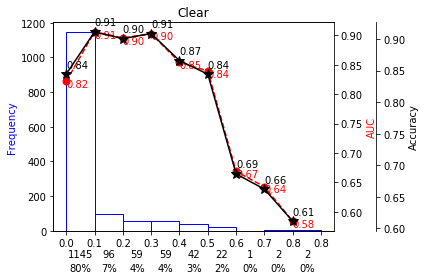

In [35]:
from matplotlib.ticker import FormatStrFormatter
Th_2_Bins=np.asarray(Bins)
data=clf.scores_
fig, ax = plt.subplots()
fig.subplots_adjust(right=0.75)
#counts, bins, patches = ax.hist(data,10 ,edgecolor='gray')
counts, bins, patches = ax.hist(data,9,facecolor="None",edgecolor='blue', lw=1)
# Set the ticks to be at the edges of the bins.
ax.set_xticks(bins)
# Set the xaxis's tick labels to be formatted with 1 decimal place...
ax.xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))


bin_centers = 0.5 * np.diff(bins) + bins[:-1]

#show % value
for count, x in zip(counts, bin_centers):
    # Label the raw counts
    ax.annotate(int(count), xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -18), textcoords='offset points', va='top', ha='center')

    # Label the percentages
    percent = '%0.0f%%' % (100 * float(count) / counts.sum())
    ax.annotate(percent, xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -32), textcoords='offset points', va='top', ha='center')
    
    # Give ourselves some more room at the bottom of the plot

ax2 = ax.twinx()
ax2.plot(Th_2_Bins,AUC_Th2, color='red',ls='dashed' )#,THbin,CCC_Per)
ax2.set_frame_on(False)
ax2.set_ylabel('AUC', color='red')
ax2.patch.set_visible(False)
for i,j in zip(Th_2_Bins,AUC_Th2):
    #ax2.annotate(("%.2f" % j),xy=(i+0.04,j-0.01), color ='red') ##############################
    ax2.annotate(("%.2f" % j),xy=(i,j-0.01), color ='red') ##############################
    ax2.plot(i,j, marker='o', markersize=7, color="red")


    
ax3 = ax.twinx()
ax3.plot(Th_2_Bins,ACC_Th2, color='black')#,THbin,CCC_Per)
ax3.set_frame_on(False)
ax3.set_ylabel('Accuracy', color='black')






for i,j in zip(Th_2_Bins,ACC_Th2):
     #ax3.annotate(("%0.2f" % j),xy=(i-0.05,j), color='black')
    #ax3.annotate(("%0.2f" % j),xy=(i-0.1,j), color='black')##################################
    ax3.annotate(("%0.2f" % j),xy=(i,j+0.01), color='black')##################################
    ax3.plot(i,j, marker='*', markersize=10, color="black")
    #ax3.annotate(("%0.2f,%0.2f" % (i,j)),xy=(i-0.05,j), color='green')
    #ax3.annotate(("%0.3f" %j),xy=(i,j), color='green')


    
    
    
    
# Move the last y-axis spine over to the right by 20% of the width of the axes
ax3.spines['right'].set_position(('axes', 1.15))
ax3.spines['right'].set_visible(True)

# To make the border of the right-most axis visible, we need to turn the frame
# on. This hides the other plots, however, so we need to turn its fill off.
ax3.set_frame_on(True)
ax3.patch.set_visible(False)


#ax.plot(bins,np.linspace(0,1,11))
plt.subplots_adjust(bottom=0.15)
plt.grid(False,which='both')
ax.set_ylabel('Frequency')
ax.yaxis.label.set_color('Blue')
plt.title("Clear")
plt.tight_layout()
# #Save the image

filename='Corr_StabilitySelection_TH2'
save_format='png'
#print filename+'.'+save_format
#pp='home/ralfahad/Pictures'
#plt.savefig(filename+'.'+save_format,dpi=100)
# plt.savefig(filename+'.'+save_format,dpi=300, bbox_inches='tight')
plt.show()



In [36]:
# for i,j in zip(Th_2_Bins,AUC_Th2):
#     print i,j
All_ACC=[]
All_AUC=[]
ALL_Bins=[]
All_SV=[]
NumberofElement=[]
for i,j,k,l in zip(Th_2_Bins,ACC_Th2,AUC_Th2, SV):
    Th2Index=np.squeeze(np.asarray(np.where(clf.scores_>=i)))
#     print ("{0:.2f}".format(i)),("{0:.2f}".format(j)),("{0:.2f}".format(k)),len(Th2Index),("{0:.2f}".format(l))
#     NumberofElement.append(len(Th2Index))
    print ("{0:.2f}".format(i)),("{0:.2f}".format(j)),("{0:.2f}".format(k)),len(Th2Index)
    NumberofElement.append(len(Th2Index))
    ALL_Bins.append("{0:.2f}".format(i))
    All_ACC.append("{0:.2f}".format(j))
    All_AUC.append("{0:.2f}".format(k))
    All_SV.append("{0:.2f}".format(l))

# Selected_Feature_Result=pd.concat([pd.DataFrame(ALL_Bins),pd.DataFrame(All_ACC),
#            pd.DataFrame(All_AUC),pd.DataFrame(NumberofElement),pd.DataFrame(All_SV)],axis=1)
# Selected_Feature_Result.columns=['Threshold','ACC','AUC','NoEle','SV']
Selected_Feature_Result=pd.concat([pd.DataFrame(ALL_Bins),pd.DataFrame(All_ACC),
           pd.DataFrame(All_AUC),pd.DataFrame(NumberofElement)],axis=1)
Selected_Feature_Result.columns=['Threshold','ACC','AUC','NoEle']
Selected_Feature_Result

0.00
0.09
0.19
0.28
0.38
0.47
0.56
0.66
0.75


,Threshold,ACC,AUC,NoEle
0,0.00,0.84,0.82,1428
1,0.09,0.91,0.91,283
2,0.19,0.90,0.90,187
3,0.28,0.91,0.90,128
4,0.38,0.87,0.85,69
5,0.47,0.84,0.84,27
6,0.56,0.69,0.67,5
7,0.66,0.66,0.64,4
8,0.75,0.61,0.58,2


In [37]:
Th_2_Bins[4]

0.37555555555555553

In [38]:
# Need to chage gamma range . It is selecting too many features
# Let 0.34 is our best Thr. TO get the index numer with this thr
fealoc=np.squeeze(np.asarray(np.where(clf.scores_>=Th_2_Bins[4])))
fealoc
# len(fealoc)
# Do you get it? yes > How about number of support of the model?

array([  14,   58,   62,  112,  117,  126,  184,  201,  217,  220,  229,
        238,  262,  269,  272,  286,  321,  337,  338,  345,  361,  370,
        379,  389,  405,  438,  447,  462,  472,  476,  491,  499,  526,
        659,  689,  740,  744,  752,  762,  801,  808,  820,  843,  859,
        887,  904,  938,  939,  956, 1006, 1092, 1127, 1136, 1156, 1157,
       1161, 1170, 1171, 1177, 1195, 1228, 1229, 1231, 1238, 1273, 1274,
       1356, 1404, 1422], dtype=int64)

In [39]:
ROI=fealoc%68
ROI
np.unique(ROI,return_counts=True)

(array([ 0,  1,  3,  4,  5,  7,  9, 13, 14, 15, 16, 20, 21, 23, 25, 27, 30,
        34, 39, 43, 44, 47, 48, 49, 50, 53, 54, 55, 58, 60, 62, 64, 65, 66],
       dtype=int64),
 array([3, 1, 1, 5, 3, 1, 1, 1, 5, 2, 1, 1, 2, 1, 1, 1, 2, 1, 4, 1, 2, 1,
        2, 4, 2, 1, 3, 1, 3, 2, 2, 3, 4, 1], dtype=int64))

In [40]:
len(np.unique(ROI))
# np.unique(ROI,return_counts=True)

34

In [41]:
for th in Th_2_Bins:
    clf_Tune.fit(X_train[:,np.squeeze(np.asarray(np.where(clf.scores_>=th)))],y_train)
    print (X_train[:,np.squeeze(np.asarray(np.where(clf.scores_>=th)))].shape ,y_train.shape)
    print ('Finish tuning')
    print (float(len(clf_Tune.best_estimator_.support_vectors_))/X_train[:,np.squeeze(np.asarray(np.where(clf.scores_>=th)))].shape[0]*100)
# use tuned parameter on to get model
#y_p = clf_Tune.best_estimator_.predict(X_test[:,np.squeeze(np.asarray(np.where(clf.scores_>=i)))])

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:  6.6min finished


(1490, 1428) (1490, 1)
Finish tuning
88.9261744966443
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   20.2s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   58.7s finished


(1490, 283) (1490, 1)
Finish tuning
44.966442953020135
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   24.1s finished


(1490, 187) (1490, 1)
Finish tuning
39.12751677852349
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   16.3s finished


(1490, 128) (1490, 1)
Finish tuning
59.73154362416108
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   10.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


(1490, 69) (1490, 1)
Finish tuning
46.71140939597315
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    6.1s finished


(1490, 27) (1490, 1)
Finish tuning
32.75167785234899
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    4.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


(1490, 5) (1490, 1)
Finish tuning
72.21476510067114
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    4.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


(1490, 4) (1490, 1)
Finish tuning
73.95973154362416
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 110 out of 125 | elapsed:    3.4s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    3.7s finished


(1490, 2) (1490, 1)
Finish tuning
73.8255033557047


In [42]:
# float(len(clf_Tune.best_estimator_.support_vectors_))/X_train[:,np.squeeze(np.asarray(np.where(clf.scores_>=0.25)))].shape[0]*100

In [43]:
# result it overfitting need to be less or equal to 40%

# Rank the Feature Vectors as their importance

In [44]:
# Rank the Features according to the importance
names=range(0,1428) # Feature names used as 1-1428 features
cn=np.asarray(names) # converted as numpy.ndarray
# print "Features sorted by their score:"
b= sorted(zip(map(lambda x: round(x, 4), clf.scores_), cn), reverse=True)
# print b
bb=np.asarray(b)
rakfe=bb[bb[:,0]>=Th_2_Bins[4]]
# rakfe=bb[bb[:,0]>=.50]
ROIs=rakfe[:,1]%68
print (ROIs)
print (len(ROIs))

[65. 13. 49. 48. 58.  5. 64. 21. 47.  4. 65.  0. 62.  0. 15. 50. 27.  4.
  4. 53. 21.  0. 34. 58. 60. 23. 30.  5. 49. 14. 39. 64. 48.  1. 25. 14.
  3. 54. 39. 16. 43. 39. 20.  9.  4. 65. 49. 44. 14. 30. 62.  4. 64. 44.
 50.  7. 39. 58. 60. 14. 66. 65. 14. 54.  5. 55. 54. 15. 49.]
69


In [45]:
# # b
# ROIstime=np.floor(rakfe[:,1]/68)
# timeloc=ROIstime*10
# plt.hist(timeloc, bins=20)

In [46]:
ROI
print (np.unique(ROI,return_counts=True))
print (len(np.unique(ROIs)))

(array([ 0,  1,  3,  4,  5,  7,  9, 13, 14, 15, 16, 20, 21, 23, 25, 27, 30,
       34, 39, 43, 44, 47, 48, 49, 50, 53, 54, 55, 58, 60, 62, 64, 65, 66],
      dtype=int64), array([3, 1, 1, 5, 3, 1, 1, 1, 5, 2, 1, 1, 2, 1, 1, 1, 2, 1, 4, 1, 2, 1,
       2, 4, 2, 1, 3, 1, 3, 2, 2, 3, 4, 1], dtype=int64))
34


In [47]:
ROIs[0]

65.0

In [48]:
# Roiname=pd.read_csv("/home/sultan/EEG/Source_Level_Analysis/DK_atlas_Visualize_index_v1.csv")
Roiname=pd.read_csv("C:/Users/sultan/OneDrive - The University of Memphis/RESEARCH2017S/0_Source_Level_Analysis_19/FINAL_DATA_FOR_GITHUB/Source_Level_Analysis/DK_atlas_Visualize_index_v1.csv")

In [49]:
nor=80
shdkroi=Roiname['Desikan_Freesurfer_v5.1'] # "Desikan_Freesurfer_v5.1"  is the label of short name columns 
sdk=shdkroi[ROIs]# ROIs is the index of label
# sdk.head(nor)

In [50]:
dkfull=Roiname['BrainMesh_ICBM152.nv']
dk=dkfull[ROIs]
print (dk.head(nor))
len(dk.head(nor))

65.0                temporalpole R
13.0                    fusiform R
49.0                  precentral R
48.0                  precentral L
58.0            superiorparietal L
5.0          caudalmiddlefrontal R
64.0                temporalpole L
21.0            isthmuscingulate R
47.0          posteriorcingulate R
4.0          caudalmiddlefrontal L
65.0                temporalpole R
0.0                     bankssts L
62.0               supramarginal L
0.0                     bankssts L
15.0            inferiorparietal R
50.0                   precuneus L
27.0                     lingual R
4.0          caudalmiddlefrontal L
4.0          caudalmiddlefrontal L
53.0    rostralanteriorcingulate R
21.0            isthmuscingulate R
0.0                     bankssts L
34.0             parahippocampal L
58.0            superiorparietal L
60.0            superiortemporal L
23.0            lateraloccipital R
30.0              middletemporal L
5.0          caudalmiddlefrontal R
49.0                

69

In [51]:
# aa=pd.DataFrame(dk.values[0:nor])
# aa.columns=['ROIs']
# ab=aa.drop_duplicates()
# Toprois=pd.DataFrame(ab.values)
# print Toprois

In [52]:
# rois1=bb[0:16,1]%68
# pd.DataFrame(bb[0:16,0],shdkroi[rois1])

In [53]:
# saa=pd.DataFrame(sdk.values[0:nor])
# saa.columns=['short ROIs']
# sab=saa.drop_duplicates()
# sToprois=pd.DataFrame(sab.values)
# # print sToprois

In [54]:
# nor1=14
# sc=pd.DataFrame(bb[0:nor1,0])
# sn=pd.concat([Toprois,sToprois,sc],axis=1)
# sn.columns=['Fullname','ROIs short name', 'Feature score'] # sn: score and roi
# # ddd=pd.DataFrame(bb[0:16,0],sToprois)
# sn

In [55]:
# sn.to_csv('Top15fea.csv')
# Th_2_Bins

In [56]:
aa=pd.DataFrame(dk.values[0:nor])
aa.columns=['ROIs']
Toprois=pd.DataFrame(aa.values)
# print Toprois

In [57]:
saa=pd.DataFrame(sdk.values[0:nor])
saa.columns=['short ROIs']
sToprois=pd.DataFrame(saa.values)
# print sToprois

In [58]:
nor1=75
sc=pd.DataFrame(bb[0:nor1,0])
sn=pd.concat([Toprois,sToprois,sc],axis=1)
sn.columns=['Fullname','ROIs short name', ' Feature score'] # sn: score and roi
# ddd=pd.DataFrame(bb[0:16,0],sToprois)
sn

,Fullname,ROIs short name,Feature score
0,temporalpole R,rTP,0.845
1,fusiform R,rFUS,0.810
2,precentral R,rPRC,0.680
3,precentral L,lPRC,0.665
4,superiorparietal L,lSP,0.625
5,caudalmiddlefrontal R,rCMF,0.560
6,temporalpole L,lTP,0.550
7,isthmuscingulate R,rIST,0.535
8,posteriorcingulate R,rPCG,0.535
9,caudalmiddlefrontal L,ICMF,0.520


In [59]:
allrois=sn.drop_duplicates(subset=['Fullname']) # Drop the duplicate name 
alluR=pd.DataFrame(allrois.values) #alluR is the unique ROIs
alluR

,0,1,2
0,temporalpole R,rTP,0.845
1,fusiform R,rFUS,0.81
2,precentral R,rPRC,0.68
3,precentral L,lPRC,0.665
4,superiorparietal L,lSP,0.625
5,caudalmiddlefrontal R,rCMF,0.56
6,temporalpole L,lTP,0.55
7,isthmuscingulate R,rIST,0.535
8,posteriorcingulate R,rPCG,0.535
9,caudalmiddlefrontal L,ICMF,0.52


In [60]:
# alluR.to_csv('Top14.csv')

In [61]:
# alluR

In [62]:
len(clf.scores_)

1428

# AllROIs_stability selection_score

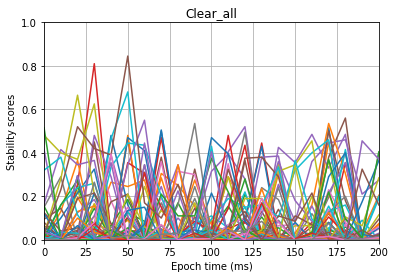

In [63]:
g=clf.scores_
allROIs=range(0,68)
x=[];
for i in allROIs:
#     print i
    r=np.arange(i,1428,68)
    l=np.int_(r)
#     ll=g[r]
    ll=g[l]
    x.append(ll)
hh=pd.DataFrame(x)  
t=np.linspace(0,200,21)
yu=hh.values
# yu=hh.values[[0,1,2,3,4,16],:]
plt.plot(t,yu.T)
plt.xlim(0, 200)
plt.ylim(0,1)
plt.grid(True)
plt.ylabel("Stability scores")
plt.xlabel("Epoch time (ms)")
plt.title("Clear_all")
# plt.legend(leg)
plt.show()

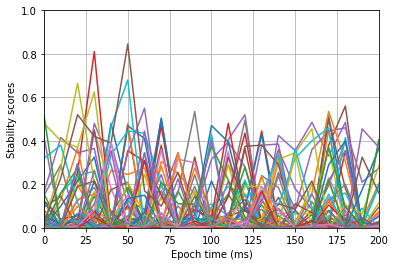

In [64]:
t=np.linspace(0,200,21)
yu=hh.values
# yu=hh.values[[0,1,2,3,4,16],:]
plt.plot(t,yu.T)
plt.xlim(0, 200)
plt.ylim(0,1)
plt.grid(True)
plt.ylabel("Stability scores")
plt.xlabel("Epoch time (ms)")
plt.show()

# Top score selected ROIs

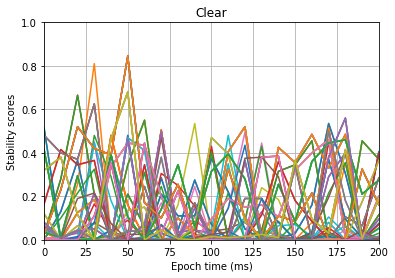

In [65]:
leg=['rTP','rFUS', 'rPRC','lPRC','lSP']
x=[];
for i in ROIs:
#     print i
    r=np.arange(i,1428,68)
    l=np.int_(r)
#     ll=g[r]
    ll=g[l]
    x.append(ll)
hh=pd.DataFrame(x)  
t=np.linspace(0,200,21)
yu=hh.values
# yu=hh.values[0:9,:]
# yu=hh.values[[0,1,2,3,4],:]
plt.plot(t,yu.T)
plt.xlim(0, 200)
plt.ylim(0,1)
plt.grid(True)
plt.ylabel("Stability scores")
plt.xlabel("Epoch time (ms)")
plt.title("Clear")
# plt.legend(leg)
plt.show()

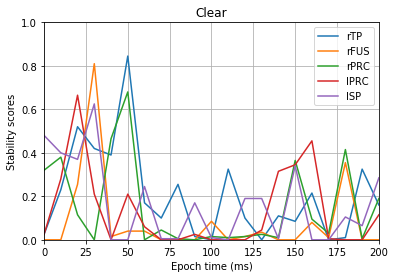

In [66]:
leg=['rTP','rFUS', 'rPRC','lPRC','lSP']
x=[];
for i in ROIs:
#     print i
    r=np.arange(i,1428,68)
    l=np.int_(r)
#     ll=g[r]
    ll=g[l]
    x.append(ll)
hh=pd.DataFrame(x)  
t=np.linspace(0,200,21)
yu=hh.values
# yu=hh.values[0:9,:]
yu=hh.values[[0,1,2,3,4],:]
plt.plot(t,yu.T)
plt.xlim(0, 200)
plt.ylim(0,1)
# plt.ylim(0.5,1)
plt.grid(True)
plt.ylabel("Stability scores")
plt.xlabel("Epoch time (ms)")
plt.title("Clear")
plt.legend(leg)
plt.show()

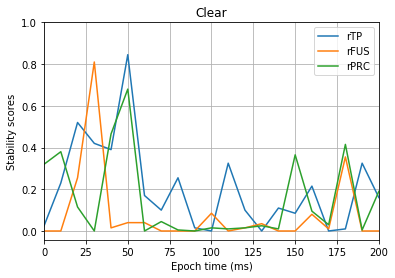

In [67]:
leg=['rTP','rFUS', 'rPRC','lPRC','lSP']
x=[];
for i in ROIs:
#     print i
    r=np.arange(i,1428,68)
    l=np.int_(r)
#     ll=g[r]
    ll=g[l]
    x.append(ll)
hh=pd.DataFrame(x)  
t=np.linspace(0,200,21)
yu=hh.values
# yu=hh.values[0:9,:]
yu=hh.values[[0,1,2],:]
plt.plot(t,yu.T)
plt.xlim(0, 200)
plt.ylim(top=1)
# plt.ylim(0.50,1)
plt.grid(True)
plt.ylabel("Stability scores")
plt.xlabel("Epoch time (ms)")
plt.title("Clear")
plt.legend(leg)
plt.show()

In [68]:
ROIs=range(0,68)
x=[];
for i in ROIs:
#     print i
    r=np.arange(i,1428,68)
    l=np.int_(r)
#     ll=g[r]
    ll=g[l]
    x.append(ll)
hh=pd.DataFrame(x) 

In [69]:
yu[1,:]

array([0.   , 0.   , 0.255, 0.81 , 0.015, 0.04 , 0.04 , 0.   , 0.   ,
       0.   , 0.085, 0.   , 0.015, 0.035, 0.   , 0.   , 0.08 , 0.01 ,
       0.355, 0.   , 0.   ])